## Lab 3:  Exploratory Data Analysis Using Sacramento Real Estate Transactions
#### CS 3300
#### Draven Schilling
#### 9/28/19

Sacramento is the capital city of California located east of San Francisco, near the crossing of the Sacramento River and the American River in Northern California. Early 2000's census data reveals there were 407,018 people, 154,581 households, and 91,202 families residing in the city. The population density was 4,189.2 people per square mile with 163,957 housing units at an average density of 1,687.5 per square mile making Sacramento approximately the 36th largest city in the US at the time. In 2010, the city's median household income was 37,049 USD, and the median family income is 42,051 USD. 

The county of Sacramento is roughly shaped like an elongated X with 4 distinct 'wings ‘and a more urbanized center. Given its intersecting water channels Sacramento is the shipping and rail center for the Sacramento Valley area and its major industries include food processing.

In this notebook we will be analyzing 2008 real estate transactions from around the Sacramento (CA) area. The dataset contains an address, city, zip, state, number of beds, number of baths, square footage, property type, sale date, price, and gps coordinates (latitude and longitude). We will attempt to analyze which if any property factors impact the price of the transaction.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

### Step 1: Load the data and provide initial assesments

We will first import the data and preview the head to verify the import was successful and to gain a reasonable idea of what the data includes.

In [2]:
realestate_readings = pd.read_csv("Sacramentorealestatetransactions.csv")
realestate_readings.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
realestate_readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


Based on initial inspection, the data set is recording information about property listings. This Includes locational data such as its gps coordinates and address as well as it's features such as beds, baths, and square feet. Finally, an associated price is also provided. The results of info() suggest the data seems to be consistent and well-structured such that every cell has been filled. All numerical data is stored as int’s (zip, beds, baths, etc.), decimal data as floats (gps coordinates), and everything else is stored as strings (street, city, state, etc.).


### Step 2: Cleaning Categorial Variables
Next, we will examine the data types of streets, zip codes, and beds to determine their implications on the data and if they should be stored differently. Based on the preview it seems fairly obvious that street is going to be unique per entry, and zip is going to be a collection of a few area codes (likely found in and or around Sacramento).
But for beds it's not as obvious. Let’s do a histogram of the data to get a better representation of the range of baths available.

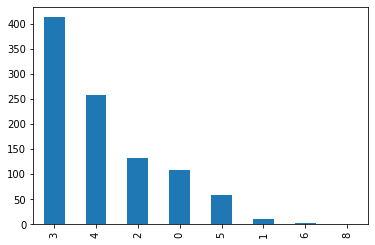

In [4]:
realestate_readings['beds'].value_counts().plot(kind='bar')

Based on the results, there can be anywhere between 0 and 8 baths for each residence but not partial baths. Given that you can’t have partial baths, it makes more sense to store number of baths as a categorial variable. This is also the case for number of beds.

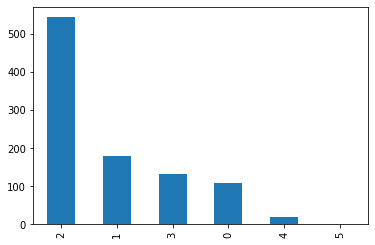

In [5]:
realestate_readings['baths'].value_counts().plot(kind='bar')

We have identified city, state, zip, beds, baths, and type as categorical variables. Now we should convert them to be stored to reflect that. Fortunately, pandas already stored city, state, and type as categorical strings.

In [6]:
type(realestate_readings["city"][0])

str

In [7]:
type(realestate_readings["state"][0])

str

In [8]:
type(realestate_readings["type"][0])

str

We only then need to convert beds, baths, and zip to strings.

In [9]:
realestate_readings.beds = realestate_readings.beds.astype(str)
realestate_readings.baths = realestate_readings.baths.astype(str)
realestate_readings.zip = realestate_readings.zip.astype(str)
realestate_readings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null object
state        985 non-null object
beds         985 non-null object
baths        985 non-null object
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 92.4+ KB


### Step 3: Finding The Independent Variable
Given what we know about the data set it seems likely that 'street' is the independent variable. The independent variable defines the unique property associated with the row. Based on the results of head() and that we know the data reflects real estate transactions, it seems highly likely the address is what identifies a transaction. Each other category has either duplicate values or is based directly on the street address. sale date could have potentially also been the independent variable but as you can clearly tell from the first few entries, there are multiple sales per given time stamp. Furthermore, latitude and longitude could have also been the independent variables, but since they are directly related to street address, it seems most likely that street address (being the single variable), is the independent variable.

### Step 4: EDA of Continuous Variables
An initial hypothesis I get from a brief examination of the data is that the price of the property increases as the size of the property increases. To test this hypothesis, a scatter plot of square footage vs price seems appropriate because both data columns are numerical, and it will show us if there are any trends.

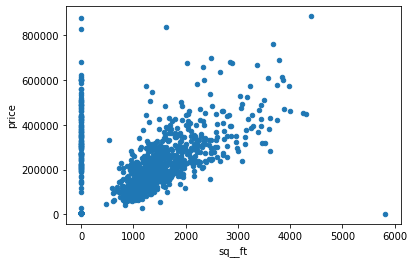

In [10]:
realestate_readings.plot(x = "sq__ft", y = "price", kind="scatter")

Given the results, it seems clear that there is a direct positive correlation between square footage and price. The strong correlation (~.8) is somewhat obvious because larger square footage means more area and generally properties with more space is more valuable.

Another hypothesis is that relative location can impact the price of a house such that some areas contain clustering’s of more valuable properties while other locations contain clustering’s of lower value properties. 
To test this hypothesis plotting latitude and longitude against price will provide results as to determine if there is a relationship. Again, a scatter plot is appropriate because both columns are numerical and the resulting visual will allow us to see clear visual clustering’s of where price highs and lows occur.  

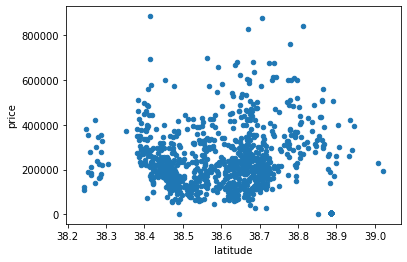

In [11]:
realestate_readings.plot(x='latitude', y='price', kind='scatter')

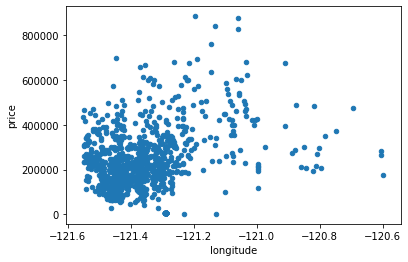

In [12]:
realestate_readings.plot(x='longitude', y='price', kind='scatter')

The results of plotting price over latitude and longitude suggest subtle but not major wealth gaps; that is there is not significant differences, but it still may suggest subtle trends. The reason that this trend is not as strong as square footage to price is likely because relative location is less important than size and quality of the house. Despite this, the subtle trends that are present might suggest poorer areas around latitude 38.5 to 38.7 but as we branch out to latitude 38.4 to -38.5 and latitude 38.7 to -38.9 the relative wealth goes slightly up. Likewise, longitude -121.4 is relatively poorer than -121.4 to -121.0. 

Given the range of latitude and longitude present within the data and that lower value properties are seemingly found more clustered in the middle of the range a new hypothesis is formed. I think the data suggests inner city areas are poorer versus properties on the outskirts which are slightly more valuable. To test this hypothesis, we can get the median latitude and longitude to approximate the center of the city and see if it aligns with the relatively poor areas.

In [13]:
round(realestate_readings["latitude"].median(),5)

38.62658

In [14]:
round(realestate_readings["longitude"].median(),5)

-121.37622

The medians closely align with poorer areas. A quick google search will also reveal that central Sacramento is found at 38.58, -121.48 which is relatively close to the medians and near the lower wealth pocket. Given these results, the hypothesis seems likely.

Next, while examining the data we can notice some odd trends from the price versus square footage graph. There seems to be a significant number of properties that have zero square footage with still large property values. Given that we never manipulated the price or square footage columns, this must mean there are errors in the data. For whatever reason during data collection it is likely that zero square footage was meant to mean missing data and/or not recorded. For now, this is a just an observation, but we may need to consider what to do about it if we are using the square footage column to further analyze the data.

### Step 5: EDA of Categorial Variables
Next, we may hypothesize the effect beds, baths, type, state, city, and zip codes have on the value of the property.
I suggest that having more beds and baths increase the value of the house. To test this, we can use a boxplot on price with bins for each number of beds and baths because beds/baths are categorical and price is numerical.

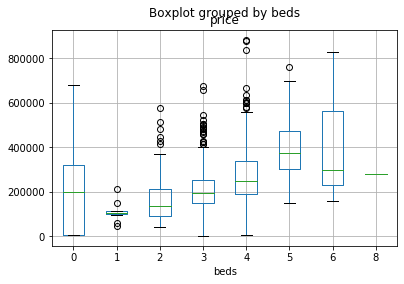

In [15]:
realestate_readings.boxplot(by = "beds", column = "price")

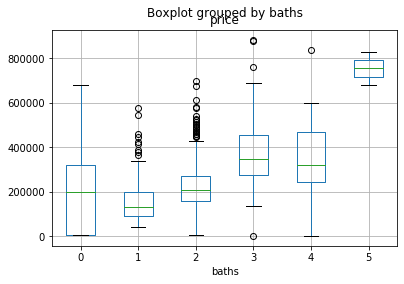

In [16]:
realestate_readings.boxplot(by = "baths", column = "price")

The first thing I notice is that having 0 beds/0 baths is odd because if these properties are all for residential living, they should all include at least 1 bed and likely at least 1 bath. Just as we suspected 0 square feet as an error in data collection, I suspect the same for beds/baths. Therefore, ignoring 0 beds/baths, there is a correlation between both number of beds and baths to price. generally, as the number of available beds/baths increase, price also increases. Although, for after 5 beds the median goes down and suggests a plateau in price after 5 beds. My guess is that there is diminishing marginal returns after 5 beds since families of 6+ are more uncommon. Likewise, for 5 baths compared to 4 baths, the median spikes way up. this is likely because 5 baths are only reserved for 'extremely luxurious' residences. There are proportionally very few data points with 5 baths and unlike beds, households of 5 for extremely wealthy families are more common which would allow each individual their own bathroom.

Next we will examine how type of the property influences its price. But first we need to determine the possible bins for type.

In [17]:
realestate_readings.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

Based on the types available, I hypothesize that Multi-Family homes will be most valuable because they generally accommodate more people while Condos will be the least valuable because they are generally smaller and accommodate 1-2 people. To test this hypothesis, we can plot cost versus type as a boxplot since type is categorical and price is numerical.

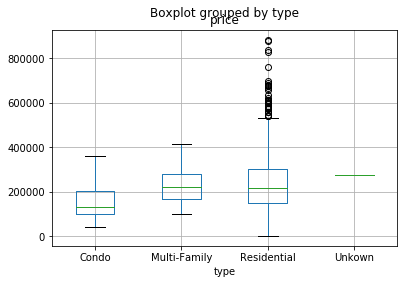

In [18]:
realestate_readings.boxplot(by = "type", column = "price")

The boxplot suggests less correlation between type and price but does show that generally condos are less valuable then Multi-Family and Residential; this is likely consistent with prediction that condos generally accommodate less people and are smaller than Multi-Family and Residential properties. We can further test this by plotting type versus square footage.
It may be wise to first remove entries with zero square footage as to not skew the model.

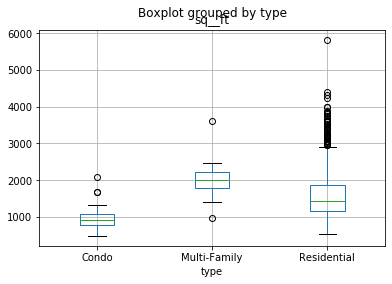

In [19]:
adjusted_readings = realestate_readings.loc[realestate_readings['sq__ft'] != 0]
adjusted_readings.boxplot(by = "type", column = "sq__ft")

The data further supports this hypothesis showing Condos have generally smaller total area then Residential and Multi-Family properties.

Next, I hypothesize no correlation between state/city/zip and price of the property. The results of analyzing latitude/longitude versus price showed us potential pockets of lower wealth in the inner city while higher wealth along the outskirts. We may be able to add further evidence to this proposition by noticing wealth gaps in state/city/zip but given the range of possible values it seems unlikley. Again, since these are all categorical and price is numerical, we will be using a boxplot to visualize the data.

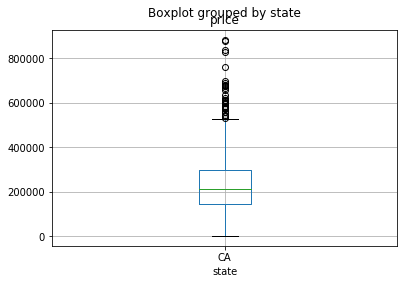

In [20]:
realestate_readings.boxplot(by = "state", column = "price")

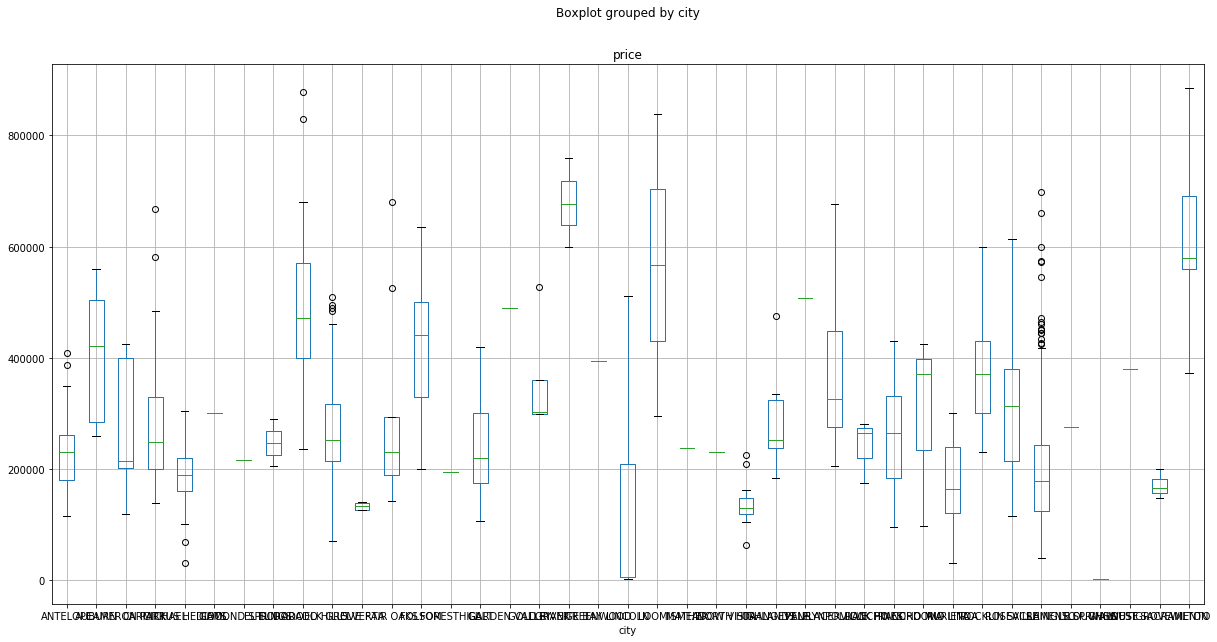

In [21]:
realestate_readings.boxplot(figsize=(20,10), by = "city", column = "price")

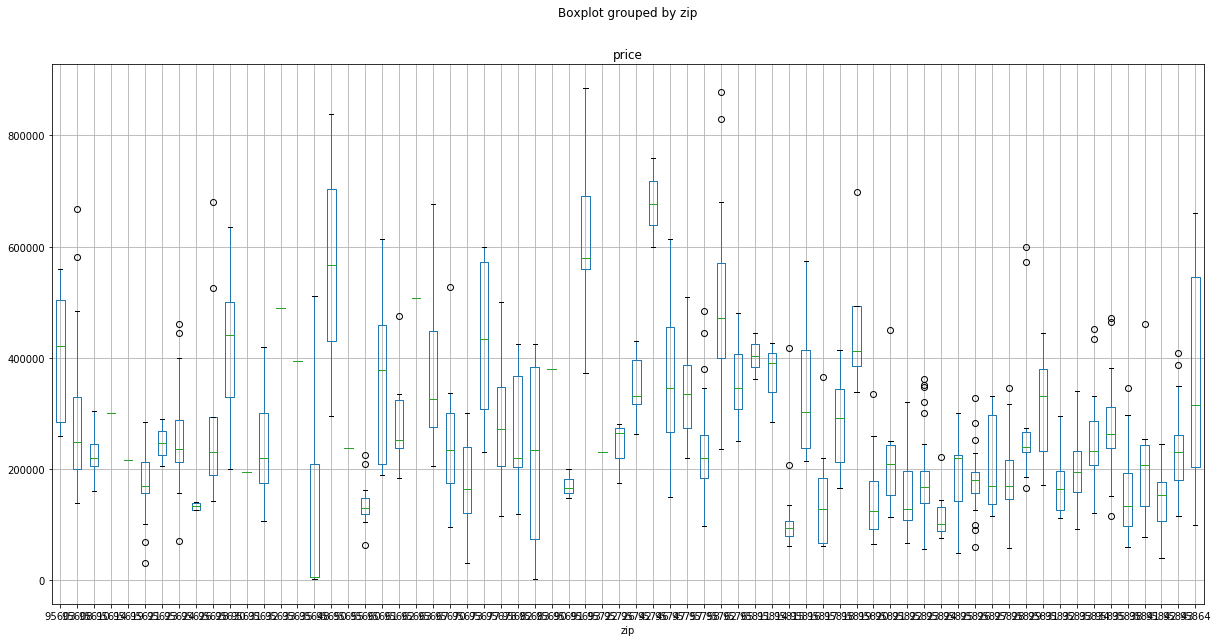

In [22]:
realestate_readings.boxplot(figsize=(20,10), by = "zip", column = "price")

The results of plotting this data is inconclusive. All of the locations are found within California, so the state column provides no useful information for analysis, and both city/zip versus price have vastly too many bins with no obvious relation between them. Though it is clear that there are major fluctuations in price over zip codes and cities. Further analysis would need to be done in order to obtain meaningful results.

### Step 6: Engineering New Variables
Next, it may be useful to verify address as the independent variable. Let’s compare the number of unique values to the total number of entries for verification.

In [23]:
len(realestate_readings.street.unique())

981

In [24]:
len(realestate_readings)

985

Given the number of rows and unique street addresses are very close but not exact implies that maybe there are a few records where a transaction was recorded on the same place at different times. Regardless I think it's still safe to confirm street is the independent variable. Unfortunately, in its current form street doesn’t give us any useful information. A hypothesis that uses street is that street type is related to price. such that 'court' and 'way' may be more quiet areas and therefore increase the value of a property compared to 'drive' and 'street' which tends to have more traffic and therefore may be less desirable and by extension have lower value.
To test this hypothesis, we first need to extract the street type form the address and store it in a new column.

In [25]:
def get_street(address):
    opt = ['AVE','BLVD','CIR','CT','DR','LN','PKWY','PL','RD','ST','WAY']
    strs = address.split()
    itr = len(strs)
    while(itr > 0):
        for item in opt:
            if(item == strs[itr-1]):
                return item
        itr = itr-1
    return "OTHER"
realestate_readings['street_type'] = realestate_readings["street"].map(lambda s: get_street(s))
realestate_readings.head(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,CT
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,WAY
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,AVE
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,DR
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,ST


Now we can plot price vs street type to test the hypothesis. Again using a boxplot since street type is categorical and price is numerical.

In [26]:
#realestate_readings.boxplot(figsize=(20,10), by = "street_type", column = "price")

In [27]:
adjusted_readings = realestate_readings.loc[realestate_readings['street_type'] == 'OTHER']
adjusted_readings.head(50)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type
309,6306 CONEJO,RANCHO MURIETA,95683,CA,4,2,3192,Residential,Tue May 20 00:00:00 EDT 2008,425000,38.512602,-121.087233,OTHER
322,9970 STATE HIGHWAY 193,PLACERVILLE,95667,CA,4,3,1929,Residential,Tue May 20 00:00:00 EDT 2008,485000,38.787877,-120.816676,OTHER
326,2733 DANA LOOP,EL DORADO HILLS,95762,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,541000,38.628459,-121.055078,OTHER
338,4030 BROADWAY,SACRAMENTO,95817,CA,2,1,623,Residential,Mon May 19 00:00:00 EDT 2008,62050,38.546798,-121.460038,OTHER
374,3128 VIA GRANDE,SACRAMENTO,95825,CA,2,1,972,Residential,Mon May 19 00:00:00 EDT 2008,125000,38.598321,-121.391610,OTHER
511,1322 SUTTER WALK,SACRAMENTO,95816,CA,0,0,0,Condo,Mon May 19 00:00:00 EDT 2008,360000,38.538050,-121.504700,OTHER
686,5890 TT TRAK,FORESTHILL,95631,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,194818,39.020808,-120.821518,OTHER
747,1813 AVENIDA MARTINA,ROSEVILLE,95747,CA,3,2,1506,Residential,Fri May 16 00:00:00 EDT 2008,255000,38.776649,-121.339589,OTHER
778,2341 BIG STRIKE TRL,COOL,95614,CA,3,2,1457,Residential,Fri May 16 00:00:00 EDT 2008,300000,38.905927,-120.975169,OTHER
814,281 SPYGLASS HL,ROSEVILLE,95678,CA,3,2,2100,Condo,Fri May 16 00:00:00 EDT 2008,350000,38.762153,-121.283451,OTHER


based on the results, there are some slight deviations based on street type. Generally speaking, the lowest value properties are AVE's, BLVD's, PKWY's, and ST's all under 20K. Versus the LN's, PL's, CT's, and DR's all hovering near 25K. Though 'other' street types / no street type seemed to be the most valuable with a median around 30K.

### Results: So what does this data reveal?
There are definitely associations between price and location/features of real estate transactions within the Sacramento area. There is clearly a direct correlation between price and square footage such that higher square footage will generally have a larger price. The same can be said for beds and baths; both beds and baths tend to increase the transaction price with beds seemingly producing diminishing marginal returns and baths having exponential returns (likely to a limit). 
As for locational, there are associations between regional wealth gaps, but none directly identified. As a extension for further analysis I would hypothesize zip codes and cities to match with the latitude and longitude results such that cities and zip codes with larger transactions be found on the outskirts of Sacramento while lower transactions be found nearer the center. Another testable locational hypothesis could be that properties directly on one of the rivers in Sacramento would be more valuable then inland properties.  

In [54]:
realestate_readings["baths"].plot.hist()

TypeError: Empty 'DataFrame': no numeric data to plot